<a href="https://colab.research.google.com/github/Angelo254/Employee-Churn-Rate/blob/main/Study_Case_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis

In [1]:
#imorting required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading through the dataset
df = pd.read_csv('/content/HR_comma_sep (1).csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
#checking for column names
for col_names in df.columns:
  print(col_names)

satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
left
promotion_last_5years
sales
salary


In [5]:
#sales column should be renamed as departments
df.rename(columns={'sales':'Departments'}, inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


The attributes in detail are:
* satisfaction_level: It is employee satisfaction point, which ranges from 0-1.
* last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1.
* number_project: How many numbers of projects assigned to an employee?
* average_monthly_hours: How many average numbers of hours worked by an employee in a month?
* time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.
* work_accident: Whether an employee has had a work accident or not.
* left: Whether the employee has left the company or not.
* promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.
* Departments: Employee's working department/division.
* salary: Salary level of the employee such as low, medium and high.

In [6]:
#checking for unique values in both department column and salary column
print(df.Departments.unique())
print(df.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
#checking the percentage of employees who left the company
print(df.left.value_counts()/len(df)*100)

0    76.191746
1    23.808254
Name: left, dtype: float64


* 23% of the emplyees left the company

In [9]:
#finding the reasons as to why the employees left the company
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


* As we can see above employees who left the company had low satisfaction level, worked more hours and had low promotion rate.



## Data Visualization

In [10]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


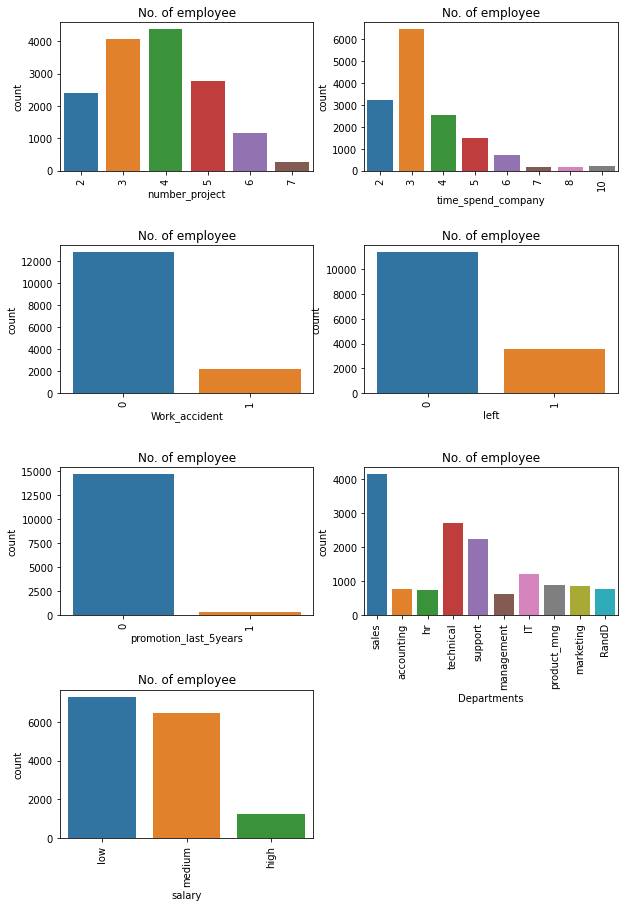

In [11]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")
plt.savefig('a')


As we can see above;
* The number of projects is generally 3-4.
* The number of promotions last 5 years is very less.
* Most of the employees are in the sales department.
* Most of the salary are in the range low to medium.

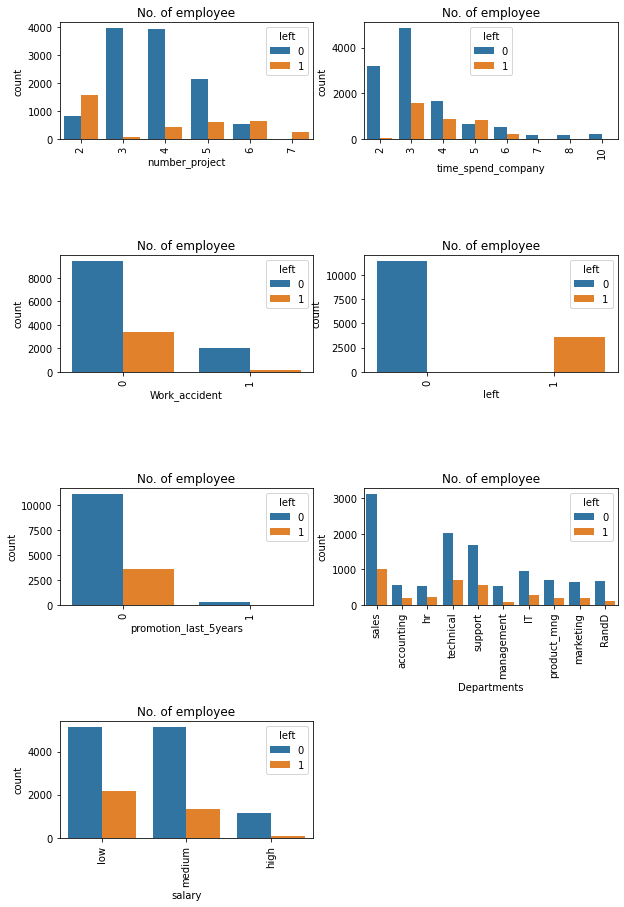

In [12]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")
plt.savefig('b')

* As the number of projects is 6-7, the number of employees quiting increased.
* when an employee spends 5 years in a company there are more chances of him/her leaving the company.
* Employees who don't get promotions are more likely to leave the company.
* More number of employes in low salary range left the company.

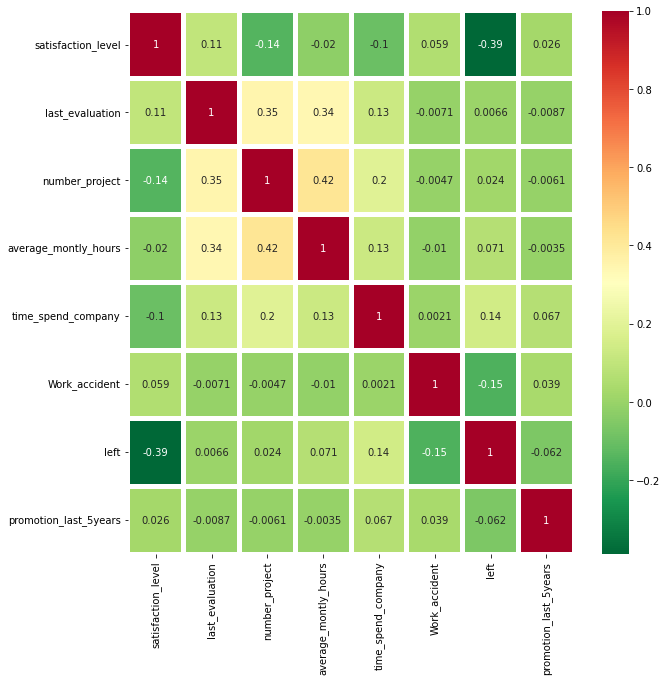

In [13]:
#visualizing using a heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap="RdYlGn_r",linewidths=4.0)
plt.show()

* Looking at the correlation matrix we can see that for the employees who left the company, the highest negative correlation is with satisfation level. Which implies that as satisfaction level increases the number of employees leaving the company decreases.

## Cluster Analysis

In [14]:
from sklearn.cluster import KMeans
left_emp =  df[['satisfaction_level', 'last_evaluation']][df.left == 1]
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

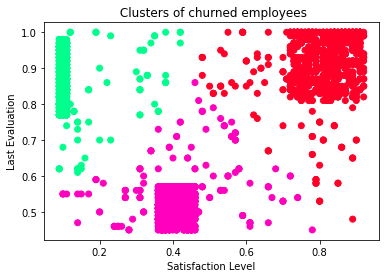

In [15]:

left_emp['label'] = kmeans.labels_
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='gist_rainbow')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title(' Clusters of churned employees')
plt.show()

As shown above there are three categories of employees;
* High satisfaction and high performance.
* Low satisfaction and high performance.
* Low satisfaction and low performance.

# Modelling

##Label Encoding

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['salary']=le.fit_transform(df['salary'])
df['Departments']=le.fit_transform(df['Departments'])

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


## Splitting to training and validation data set

In [17]:
y=df.left
X = df.drop('left',axis=1) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Fitting data to the model and predicting using Decision Tree
* I chose decision tree because I need to understand the features which are driving the employees to leave the company. The decision tree helps me to understand this and also helps to understand the feature importance

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
depth = [i for i in range(5,21,1)]
samples = [i for i in range(50,500,50)]
parameters = dict(max_depth=depth, min_samples_leaf=samples)
param_search = GridSearchCV(dt, parameters)
param_search.fit(X_train, y_train)
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


In [19]:
df1 = DecisionTreeClassifier(random_state=42,max_depth=5,min_samples_leaf=50)
df1.fit(X_train, y_train)
y_dt_pred = df1.predict(X_test)

In [20]:
feature_importances = df1.feature_importances_
feature_list = list(X)
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction_level,0.571739
last_evaluation,0.145911
time_spend_company,0.134703
number_project,0.091590
average_montly_hours,0.055407
Departments,0.000650
Work_accident,0.000000
promotion_last_5years,0.000000
salary,0.000000


In [21]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_dt_pred))
print("Precision:",metrics.precision_score(y_test, y_dt_pred))
print("Recall:",metrics.recall_score(y_test, y_dt_pred))

Accuracy: 0.9635555555555556
Precision: 0.9468503937007874
Recall: 0.8973880597014925


# Conclusion
* Employees are leaving because of low salary, low promotion rate and higher number of projects.
* I have noted that there are three different clusters of employees.
* I have noted that the most important feature is satisfaction level from correlation matrix and also from decision tree.
* I have also built a model with good accuracy and precision indicating that the model can accurately predict if the employee will leave the company or not.